# What is scikit-learn ?

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

The best part of Scikit learn is you can get your hands on vast amount of machine learning algorithms that you can just try them out with minimul code adjustments.
The library is well documented and maintained so you can just visit and look at it : [scikit-learn](https://scikit-learn.org/stable/)

### How to install scikit-learn ?
To install it you just need to type this commands
```
pip install -U scikit-learn
```
```
conda install scikit-learn
```
For more information about installation : [scikit-learn/install](https://scikit-learn.org/stable/install.html)

In [ ]:
#To check the version of the library installed
!python -m pip show scikit-learn

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, scipy, joblib
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


### Machine Learning Steps

Before diving into scikit-learn, lets see what is the **General Pipeline of Machine Learning**
<p align="center">
<img src="https://miro.medium.com/max/724/1*JKhDtrILrWho1U-TEOzmYA.png" width="600" height="300">
</p>

**Supervised Learning**
<p align="center" >
  <img src="https://www.commercient.com/wp-content/uploads/2019/12/0_9IwCpy_JSKZMGlW0.gif" width="700" height="300" />
</p>

**Unsupervised Learning**
<p align="center" >
  <img align="center" src="https://miro.medium.com/max/1680/1*HU617gljScDVnanadMzCcQ.gif" width="700" height="300"  />
  </p>
  



# Supervised Learning using scikit-learn


## Classification

There are many types of classification algorithms that you can choose from such as Linear Models, Support Vector Machines, Nearest Neigbors, Stochastic Gradient Descent and many more.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_wine
wine_data=load_wine()

In [ ]:
wine_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
print(wine_data["feature_names"])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
print(wine_data["target_names"])

['class_0' 'class_1' 'class_2']


In [ ]:
wine_df= pd.DataFrame(data=wine_data["data"], columns=wine_data["feature_names"])
print("The DataFrame has {} samples and {} features".format(wine_df.shape[0], wine_df.shape[1]))
print("\n")
wine_df.head()

The DataFrame has 178 samples and 13 features




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
wine_df["class"]=wine_data["target"]

In [ ]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
print(wine_df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3e6947d68>,
      dtype=object)

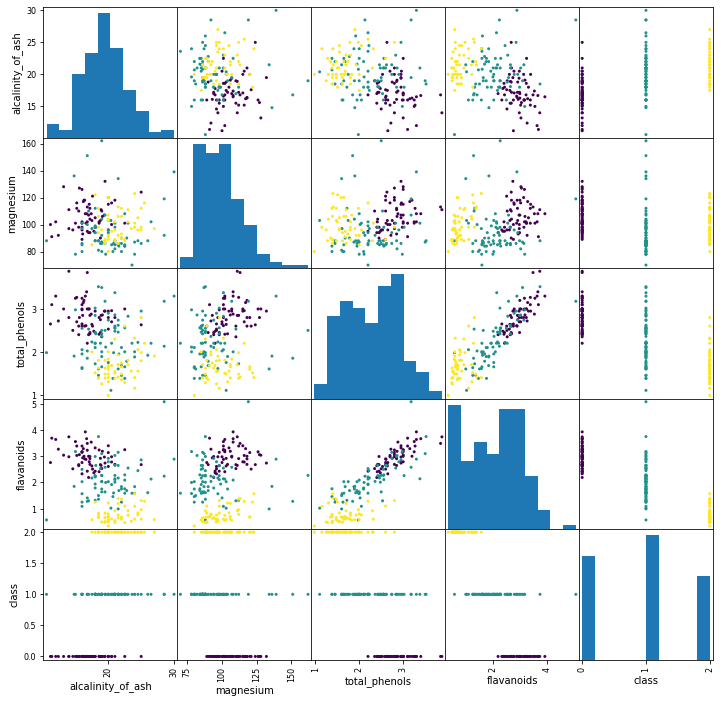

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(wine_df[["alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "class"]], c=wine_df["class"] , figsize=(12,12), alpha=1)

In [ ]:
# X label data
X = wine_df.drop("class", axis=1)
y= wine_df["class"]


In [ ]:
#Lets split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.25)

In [ ]:
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Training set: x->(133, 13) , y->(133,) 
 Testing set: x->(45, 13) , y->(45,)


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Evaluating the model

In [ ]:
print("Training accuracy of the model is {:.2f}".format(gnb.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(x_test, y_test)))

Training accuracy of the model is 0.98
Testing accuracy of the model is 0.96


In [ ]:
predictions = gnb.predict(x_test)
print(predictions)

[1 1 2 1 0 0 2 1 0 2 1 2 1 2 0 2 0 0 0 2 1 0 1 0 1 2 1 2 1 1 1 2 2 0 1 1 2
 0 1 0 1 0 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[14  1  0]
 [ 1 17  0]
 [ 0  0 12]]


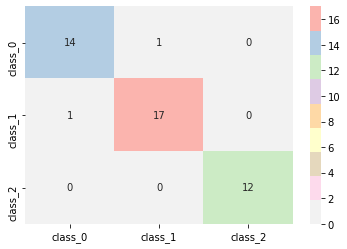

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

### Support Vector Classifier

<p align="center">
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_1.png"
</p>

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Evaluating the model

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.99
Testing accuracy of the model is 0.96


In [ ]:
predictions = svc.predict(x_test)
print(predictions)

[1 1 2 0 0 0 2 1 0 2 1 2 1 2 0 2 0 0 0 2 1 0 1 0 1 2 0 2 1 1 1 2 2 0 1 1 2
 0 1 0 1 0 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[15  2  0]
 [ 0 16  0]
 [ 0  0 12]]


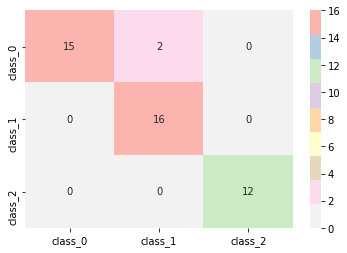

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

### Ensemble Classifier (Random Forest)

<p align="center">
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" width="500"
</p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Evaluating the model

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))


The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.96


In [ ]:
predictions = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[14  1  0]
 [ 1 17  0]
 [ 0  0 12]]


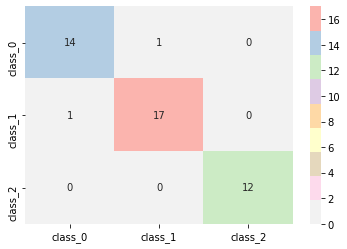

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

### Neural Network Classifier
<p align="center">
<img src="https://jeppbautista.files.wordpress.com/2019/03/nural-network-banner.gif" width= "500"
</p>

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Evaluating the model

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

In [ ]:
predictions = nnc.predict(x_test)
print(predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

## Regression

In [ ]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [ ]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
# Converting the dataset to a Dataframe object
boston_df = pd.DataFrame(boston_data["data"], columns=boston_data["feature_names"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_df = boston_df.assign(PRICE=boston_data["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
# Splitting the dataset
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(boston_data["data"], boston_data["target"], test_size=0.25, random_state=1 )

### Linear Regression
<p align="center">
<img src="https://cdn.nextjournal.com/data/QmfPuPp4V74FyvTTojMj6ix9T8Skj1ji4GhX5Pr6zK8w4N?filename=linear-regression.png&content-type=image/png" width="500"
</p>

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Evaluating the model

In [ ]:
regr.score(x_test, y_test)

0.819261126230987

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(regr.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(regr.score(x_test, y_test)))

The Training accuracy of the model is 0.92
The Testing accuracy of the model is 0.82


In [ ]:
predictions = regr.predict(x_test)
print(predictions)

[ 4.26702517e-01  7.93411688e-01  1.63140364e+00  6.24938650e-01
 -3.98162398e-01  6.91935287e-04  1.73799511e+00  6.46068901e-01
 -2.09736502e-02  2.20530318e+00  1.04053701e+00  1.97141777e+00
  7.69123756e-01  1.63374753e+00 -1.13136572e-01  1.96228171e+00
  1.97329009e-01  1.37130499e-01  1.72103126e-01  2.01010323e+00
  6.89276656e-01 -4.26202172e-02  1.17025225e+00  3.51915392e-01
  1.43924134e+00  1.73668926e+00 -1.80214110e-01  1.66605029e+00
  1.31085892e+00  8.12048324e-01  1.37941754e+00  2.11138662e+00
  1.67651652e+00  4.64179132e-02  1.55522172e+00  9.95076884e-01
  1.92302909e+00  4.02634720e-01  1.16397666e+00  4.36464763e-02
  1.06343311e+00 -2.08216835e-01  1.08855422e+00 -2.51326858e-01
  1.67808122e-01]


In [ ]:
print("The coefficients of the function are {}".format(regr.coef_))
print("The intercept of the function is {}".format(regr.intercept_))

The coefficients of the function are [-0.07834626  0.02104476 -0.0443066   0.0271313  -0.00190622  0.1579099
 -0.46820267 -0.59975241  0.12668089  0.04949418 -0.25761241 -0.29170287
 -0.00070313]
The intercept of the function is 3.5462936542131147


In [ ]:
# R2 score linear regression
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.819261126230987

**The equation of the funtion generated :**
<p align="center">
$\hat{Y} = \theta_{1}X_{1} + \theta_{2}X_{2}+ \theta_{3}X_{3} + \theta_{4}X_{4} + .......... + \theta_{13}X_{13}$ + b
</p>


### Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge
rid= Ridge()
rid.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Evaluating the model

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rid.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rid.score(x_test, y_test)))

The Training accuracy of the model is 0.91
The Testing accuracy of the model is 0.84


In [ ]:
print("The coefficients of the function are {}".format(rid.coef_))
print("The intercept of the function is {}".format(rid.intercept_))

The coefficients of the function are [-0.08307796  0.02409473 -0.08398247  0.02768841 -0.00123413  0.11644943
 -0.41859331 -0.30196245  0.10567422  0.05703408 -0.22186828 -0.27165339
 -0.00071853]
The intercept of the function is 3.4255581681516682


### Logistic Regression
Despite the name, it is used for classification problem
<p align="center">
<img src="https://qph.fs.quoracdn.net/main-qimg-7c9b7670c90b286160a88cb599d1b733" width="500"
</p>

In [ ]:
boston_df.describe()["PRICE"]

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [ ]:
boston_df["PRICE"]=pd.cut(boston_df.PRICE, bins=(4, 21, 51), labels=["low", "high"])

In [ ]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,high
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,low
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,high
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,high
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,low


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
boston_df["PRICE"]= enc.fit_transform(boston_df["PRICE"])

In [ ]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,1


In [ ]:
X=boston_df.drop("PRICE", axis=1)
y=boston_df["PRICE"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluating the model

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(log.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(log.score(x_test, y_test)))

The Training accuracy of the model is 0.85
The Testing accuracy of the model is 0.91


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(log.predict(x_test), y_test)

array([[56,  3],
       [ 9, 59]])

# Unsupervised Learning (clustering)

In [ ]:
 from sklearn.datasets import load_iris
iris_data = load_iris()

In [ ]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
print(iris_data["feature_names"])
iris_data["data"][:10]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### KMeans Clustering
<p align="center">
<img src="https://storage.googleapis.com/aihub-c2t-containers-public/release-0.2.0/kfp-components/oob_algorithm/kmeans/assets/kmeans.png" width="800"
</p>

In [ ]:
iris_data.data.shape

(150, 4)

In [ ]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=3, random_state=10)
kms.fit(iris_data.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

#### Evaluating the model

In [ ]:
kms.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
predictions=kms.labels_
print("Prediction for the KMeans Cluster")
print(predictions)

Prediction for the KMeans Cluster
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
print(iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
def transform(x):
  if x==0:
    return 1
  elif x==1:
    return 0
  else:
    return 2
predictions_2=np.array(list((map(transform,predictions)) ) )
print("Prediction for the KMeans Cluster")
print(predictions_2)

Prediction for the KMeans Cluster
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
print("Actual Levels")
print(iris_data["target"])

Actual Levels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
pd.crosstab(predictions_2, iris_data.target)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,48,14
2,0,2,36


In [ ]:
print("Performance of the KMeans Cluster {:.2f}".format(np.mean(predictions_2==iris_data.target)))

Performance of the KMeans Cluster 0.89


# Dimensionality Reduction
Using a large dataset has its own pitfalls, that is known as the curse of dimensionality. Some of the drawbacks of many dimensions are:
* Inconsistencies in features
* Redundant data
* Some features causing biasness in the model and other features are not taken into account

## Principle Component Analysis


### First example with the breast cancer dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_data=load_breast_cancer()

In [ ]:
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer_data.data.shape

(569, 30)

In [ ]:
cancer_df= pd.DataFrame(cancer_data.data, columns=cancer_data["feature_names"])
cancer_df=cancer_df.assign(target=cancer_data.target)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### Analyzing the performance without dimensionality reduction

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(cancer_data.data , cancer_data.target , test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
# Performance of the KNN model when no dimensions are reduced
print("Training accuracy is {:.2f}".format(knn.score(x_train, y_train)) )
print("Testing accuracy is {:.2f} ".format(knn.score(x_test, y_test)) )

Training accuracy is 0.95
Testing accuracy is 0.94 


#### Analyzing the performance with dimensionality reduction

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
cancer_df= pd.DataFrame(scaler.fit_transform(cancer_data.data), columns=cancer_data["feature_names"])
cancer_df=cancer_df.assign(target=cancer_data.target)

In [ ]:
cancer_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [ ]:
cancer_data.feature_names.shape

(30,)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
principal_components= pca.fit_transform(cancer_data.data)
print(principal_components)

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


In [ ]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9982211613741713

In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2"])
#principal_df.head()
main_df=pd.concat([principal_df, cancer_df[["target"]]], axis=1)

In [ ]:
main_df.head()

,principle component 1,principle component 2,target
0,1160.142574,-293.917544,0
1,1269.122443,15.630182,0
2,995.793889,39.156743,0
3,-407.180803,-67.380320,0
4,930.341180,189.340742,0


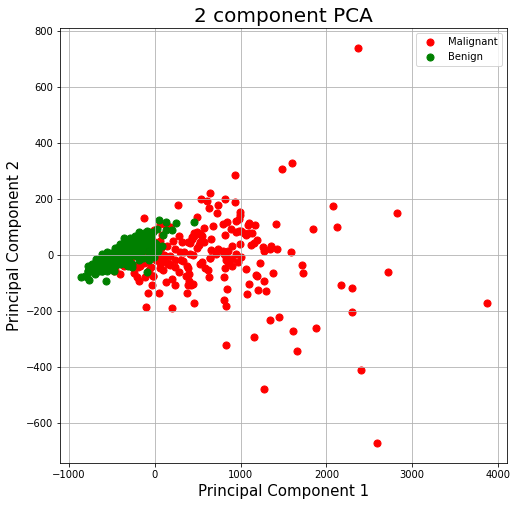

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = main_df['target'] == target
    #print(indicesToKeep)
    ax.scatter(main_df.loc[indicesToKeep, 'principle component 1']
               , main_df.loc[indicesToKeep, 'principle component 2']
               , c = color
               , s = 50)
ax.legend(["Malignant", "Benign"])
ax.grid()

In [ ]:
X= main_df.drop("target" , axis=1)
y= main_df["target"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_2=KNeighborsClassifier(n_neighbors=4)
knn_2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
#Performance of the KNN model when the 30 dimensions are reduced to 2 pca
print("Training accuracy is {:.2f}".format(knn_2.score(x_train, y_train)) )
print("Testing accuracy is {:.2f} ".format(knn_2.score(x_test, y_test)) )

Training accuracy is 0.94
Testing accuracy is 0.93 


### Second example with the Mnist dataset

In [ ]:
from sklearn.datasets import fetch_openml
mnist =fetch_openml("mnist_784")

In [ ]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist_df= pd.DataFrame(data=mnist.data , columns=mnist.feature_names)
mnist_df["Target"]=mnist.target
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(scaler.fit_transform(mnist.data), mnist.target,test_size=0.25, random_state=25 )

In [ ]:
from sklearn.neural_network import MLPClassifier
from timeit import default_timer as timer # timer is used to calculate the total time NN takes to converge
nn=MLPClassifier(hidden_layer_sizes=(10,20,7), max_iter=1000)
start_time=timer()
nn.fit(x_train, y_train)
end_time=timer()

In [ ]:
print("Total time taken to train the network is {} minutes {:.2f} seconds".format((end_time-start_time)//60 ,(end_time-start_time)%60))

Total time taken to train the network is 5.0 minutes 33.30 seconds


In [ ]:
#Performance without dimension reduction
print("Training accuracy is {:.2f}".format(nn.score(x_train, y_train)) )
print("Testing accuracy is {:.2f} ".format(nn.score(x_test, y_test)) )

Training accuracy is 0.97
Testing accuracy is 0.94 


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
data=pca.fit_transform(scaler.fit_transform(mnist.data))

In [ ]:
cols=["PC"+str(i) for i in range(1,3)]

In [ ]:
sum(pca.explained_variance_ratio_) #Amount of information lost

0.09683944770211803

In [ ]:
main_df=pd.DataFrame(data=data, columns=cols)
main_df["target"]=mnist.target
main_df.head()

,PC1,PC2,target
0,-0.891722,-4.929929,5
1,8.813522,-7.517589,0
2,2.204870,9.825045,4
3,-6.534599,-4.029251,1
4,-5.251618,3.278887,9


In [ ]:
main_df["target"].unique()

array(['5', '0', '4', '1', '9', '2', '3', '6', '7', '8'], dtype=object)

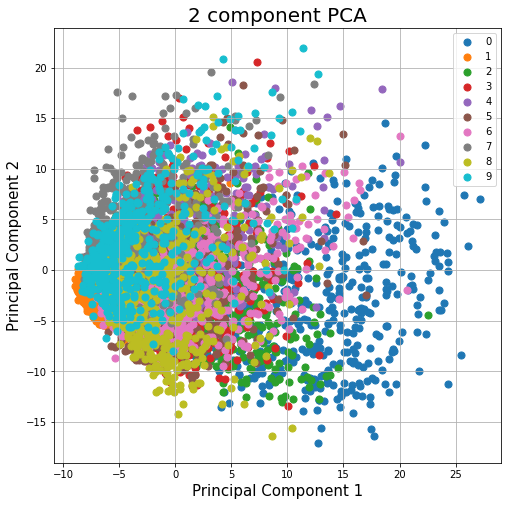

In [ ]:
#Plot for 2 component pca only (i.e the minist dataset must be reduced to 2 dimensions to run this code cell)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for target, color in zip(targets,colors):
    indicesToKeep = main_df['target']== target
    ax.scatter(list(main_df.loc[indicesToKeep, 'PC1'])[:500]
               , list(main_df.loc[indicesToKeep, "PC2"])[:500]
               , c = color
               , s = 50)
ax.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.grid()

In [ ]:
X= main_df.drop("target", axis=1)
y=main_df["target"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

In [ ]:
from timeit import default_timer as timer
nn_reduct = MLPClassifier(hidden_layer_sizes=(10,20,7), max_iter=1000)
start_time = timer()
nn_reduct.fit(x_train, y_train)
end_time = timer()

In [ ]:
print("The total time taken to train the network is {} minutes and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

In [ ]:
#Performance with dimension reduction
print("Training accuracy is {:.2f}".format(nn_reduct.score(x_train, y_train)) )
print("Testing accuracy is {:.2f} ".format(nn_reduct.score(x_test, y_test)) )

# Making Pipelines using Sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
pipe= Pipeline([("scaler", MinMaxScaler()), ("knn",KNeighborsClassifier())])

In [ ]:
mnist.data.shape

In [ ]:
pipe.fit(mnist.data[:50000], mnist.target[:50000])

# Save and load a Model

In [ ]:
#Saving the model
from sklearn.externals import joblib
filename = "model.sav"
joblib.dump(nn_reduct, filename)

In [ ]:
nn_loaded = joblib.load("model.sav")
nn_loaded.get_params

In [ ]:
nn_loaded.score(x_test, y_test)

#### **Choosing the right estimator for your task**
Different types of estimators are suitable for different types of problems. The flowchart gives some intuitions about the estimators you can work with.


<p align="center">
<img src="https://scikit-learn.org/stable/_static/ml_map.png" width="1000"/>
</p>